# 1. Functions, libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [7]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('teertha/ushealthinsurancedataset', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset


In [4]:
df = pd.read_csv(r'data/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. EDA

In [10]:
dataframe_info(df = df).sort_values(by='Unique values', ascending=True)

,Column_name,Total records,Missing Values,Data type,Unique values
1,sex,1338,0,object,2
4,smoker,1338,0,object,2
5,region,1338,0,object,4
3,children,1338,0,int64,6
0,age,1338,0,int64,47
2,bmi,1338,0,float64,548
6,charges,1338,0,float64,1337


C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


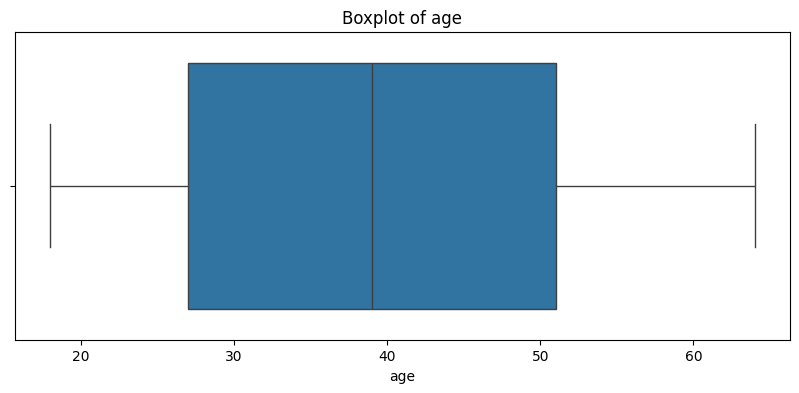

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


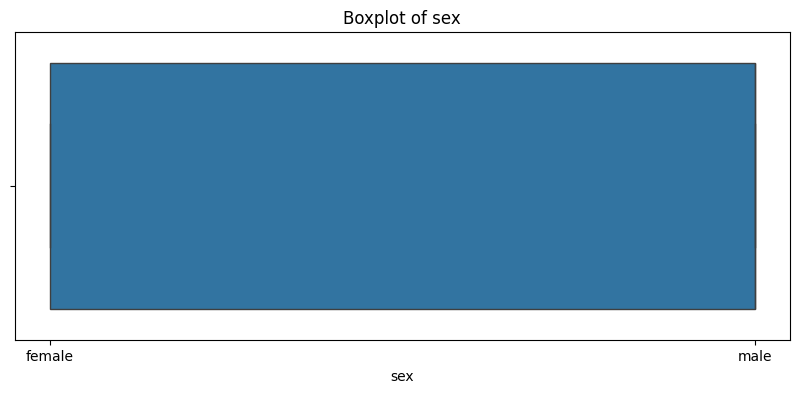

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


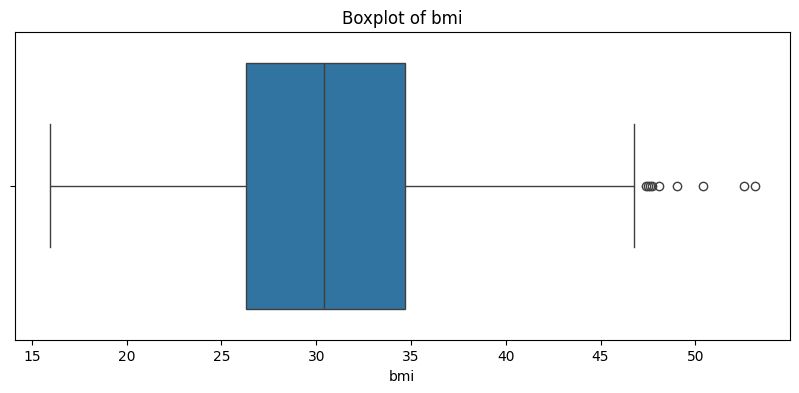

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


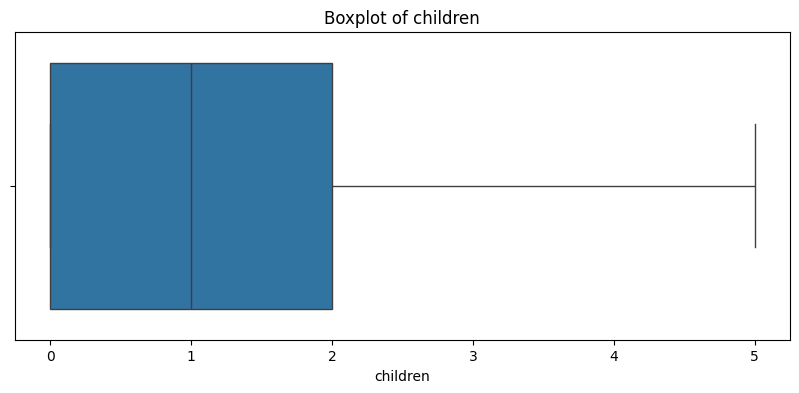

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


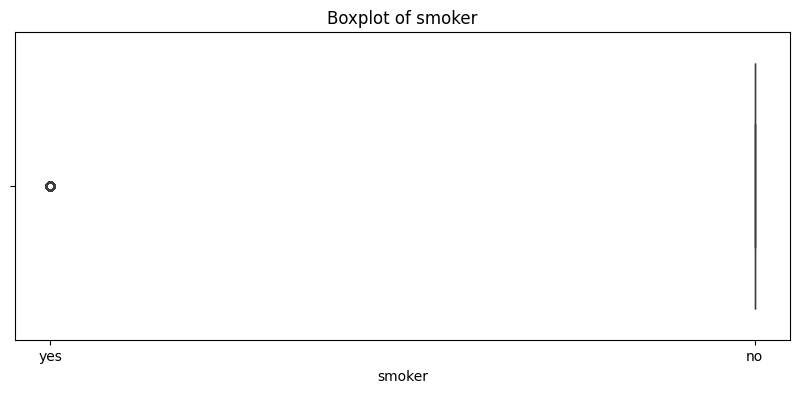

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


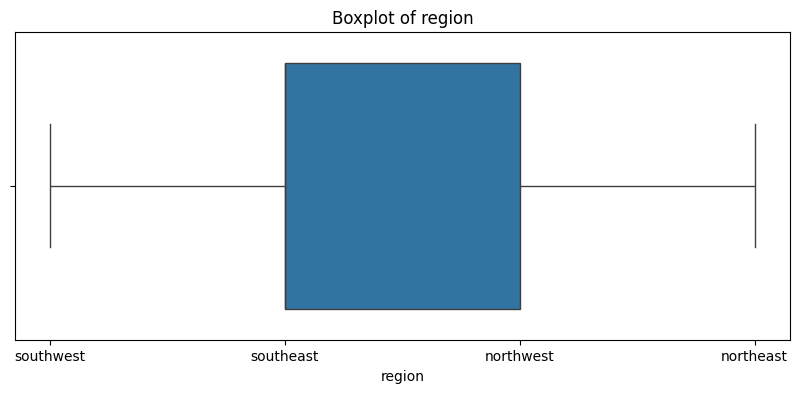

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


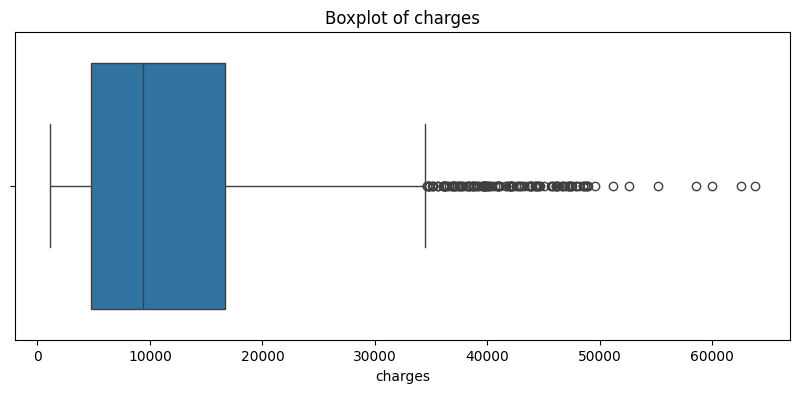

In [14]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], orient='v')
    plt.title(f'Boxplot of {col}')
    plt.show()
    plt.close()

In [16]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [18]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# 4. Encoding